# Import Library

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Loading Dataset

In [ ]:
edges = pd.read_csv("https://raw.githubusercontent.com/lulumaudhuna/social_network/refs/heads/main/fb-pages-food.edges", sep=',', header=None, names=['source', 'target'])
nodes = pd.read_csv("https://raw.githubusercontent.com/lulumaudhuna/social_network/refs/heads/main/fb-pages-food.nodes", sep=',')

In [ ]:
print(edges.head())

   source  target
0       0     276
1       0      58
2       0     132
3       0     603
4       0     398


In [ ]:
print(nodes.head())

                id                     name  new_id
0  402449106435352               Josh Marks     386
1     368969274888  Blue Ribbon Restaurants     473
2  765596333518863                Pat Neely       1
3  136870209668885               La Griglia     542
4  840078802741859              Jose Garces     189


In [ ]:
nodes.drop(columns=["id"])

,name,new_id
0,Josh Marks,386
1,Blue Ribbon Restaurants,473
2,Pat Neely,1
3,La Griglia,542
4,Jose Garces,189
...,...,...
615,Jumia Food,163
616,Luke Thomas,381
617,Clodagh McKenna,140
618,Chef Michelle Bernstein,157


In [ ]:
# Gabungkan 'source' dengan 'new_id' di nodes untuk mendapatkan 'source_name'
edges = edges.merge(nodes[['new_id', 'name']], left_on='source', right_on='new_id', how='left').rename(columns={'name': 'source_name'})

# Gabungkan 'target' dengan 'new_id' di nodes untuk mendapatkan 'target_name'
edges = edges.merge(nodes[['new_id', 'name']], left_on='target', right_on='new_id', how='left').rename(columns={'name': 'target_name'})

# Drop kolom 'new_id_x' dan 'new_id_y' karena tidak diperlukan lagi
edges = edges.drop(columns=['new_id_x', 'new_id_y'])

print(edges.head())

   source  target    source_name       target_name
0       0     276  Lee Anne Wong               KFC
1       0      58  Lee Anne Wong   Chef Jamie Gwen
2       0     132  Lee Anne Wong     Madison Cowan
3       0     603  Lee Anne Wong  Elizabeth Karmel
4       0     398  Lee Anne Wong               KFC


In [ ]:
edges.shape

(2102, 4)

In [ ]:
G = nx.from_pandas_edgelist(edges, 'source', 'target')

In [ ]:
print(G)

Graph with 620 nodes and 2102 edges


In [ ]:
G.nodes

NodeView((0, 276, 58, 132, 603, 398, 555, 1, 265, 611, 2, 182, 345, 3, 608, 377, 40, 352, 450, 484, 299, 65, 185, 228, 557, 227, 90, 151, 394, 4, 287, 254, 336, 5, 503, 6, 429, 163, 486, 478, 518, 7, 293, 305, 339, 35, 444, 583, 8, 278, 434, 73, 98, 369, 9, 317, 288, 206, 289, 249, 593, 550, 131, 446, 89, 15, 340, 248, 229, 56, 570, 189, 107, 23, 465, 67, 351, 498, 10, 393, 258, 11, 212, 485, 264, 380, 174, 259, 12, 548, 618, 310, 13, 14, 326, 70, 454, 505, 43, 432, 16, 516, 119, 400, 545, 334, 237, 374, 117, 274, 613, 466, 75, 17, 18, 408, 418, 581, 143, 599, 20, 324, 355, 481, 238, 242, 160, 21, 441, 329, 22, 270, 187, 104, 420, 128, 257, 277, 157, 343, 54, 24, 547, 230, 502, 306, 501, 591, 25, 363, 26, 27, 424, 28, 147, 527, 29, 49, 30, 126, 31, 285, 543, 357, 507, 508, 491, 169, 595, 41, 63, 327, 266, 48, 179, 546, 142, 449, 269, 524, 488, 515, 193, 315, 32, 183, 364, 159, 300, 504, 118, 430, 164, 165, 127, 395, 596, 79, 448, 335, 307, 572, 313, 45, 532, 526, 552, 517, 181, 558, 51

In [ ]:
G.edges()

EdgeView([(0, 276), (0, 58), (0, 132), (0, 603), (0, 398), (0, 555), (276, 113), (276, 149), (276, 276), (276, 296), (276, 619), (276, 494), (276, 398), (276, 598), (276, 555), (58, 23), (58, 35), (58, 89), (58, 90), (58, 265), (58, 601), (58, 434), (58, 537), (58, 350), (58, 603), (58, 611), (58, 616), (58, 302), (58, 87), (132, 198), (603, 56), (603, 67), (603, 68), (603, 90), (603, 157), (603, 182), (603, 198), (603, 217), (603, 238), (603, 151), (603, 271), (603, 317), (603, 361), (603, 340), (603, 350), (603, 355), (603, 372), (603, 39), (603, 446), (603, 558), (603, 576), (603, 584), (603, 597), (603, 601), (603, 616), (398, 113), (398, 194), (398, 319), (398, 365), (398, 522), (398, 598), (398, 555), (555, 113), (555, 149), (555, 202), (555, 308), (555, 358), (555, 365), (555, 423), (555, 459), (555, 467), (555, 494), (555, 522), (555, 565), (555, 619), (555, 598), (1, 265), (1, 611), (265, 2), (265, 4), (265, 7), (265, 9), (265, 15), (265, 18), (265, 408), (265, 32), (265, 34),

# Visualization

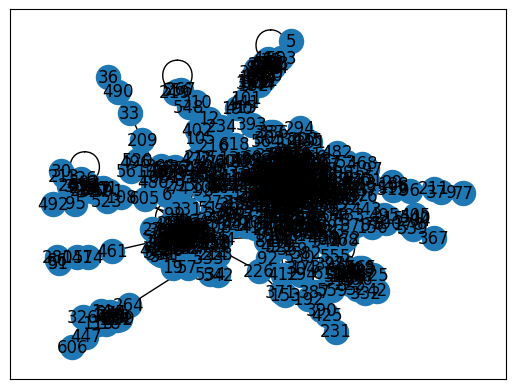

In [ ]:
nx.draw_networkx(G)

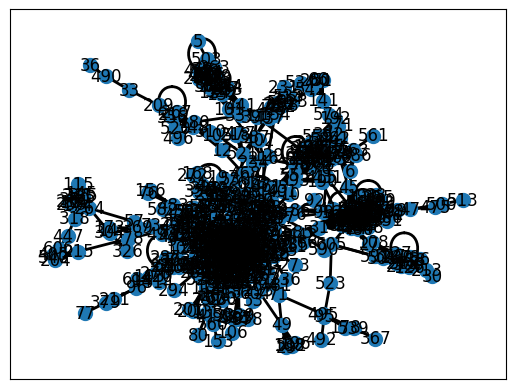

In [ ]:
nx.draw_networkx(G, with_labels=True, node_size=100, width=2)

# Network Centrality Measures

# Degree Centrality

Degree centrality mengukur seberapa banyak koneksi langsung (edge) yang dimiliki suatu node dalam graf dibandingkan dengan node lainnya. Dalam konteks dataset fb-pages-food, degree centrality mengindikasikan seberapa terhubung suatu entitas (seperti restoran, chef, atau brand) dengan entitas lainnya.

In [ ]:
degrees = dict(G.degree())
# Buat mapping ID ke nama
id_to_name = pd.Series(nodes['name'].values, index=nodes['new_id']).to_dict()

# Tampilkan derajat node dengan nama
for node, degree in sorted(degrees.items()):
    name = id_to_name.get(node, f"Node {node}")  # Gunakan nama jika ada, atau tampilkan ID
    print(f"{name} memiliki derajat {degree}")

Lee Anne Wong memiliki derajat 6
Pat Neely memiliki derajat 2
Ben Sargent & Dr. Klaw memiliki derajat 3
Chef Carlo Cracco memiliki derajat 10
George Pagonis memiliki derajat 4
Magnum memiliki derajat 1
Jumia Food memiliki derajat 5
Roy Yamaguchi memiliki derajat 7
Chili's Grill & Bar memiliki derajat 5
José Andrés memiliki derajat 28
Big Fernand memiliki derajat 2
Taco Bell Panamá memiliki derajat 6
Dunkin' Donuts memiliki derajat 3
Eckart Witzigmann memiliki derajat 1
Boston Market memiliki derajat 2
Christina Tosi memiliki derajat 10
Domino's Pizza memiliki derajat 12
Ernst Knam memiliki derajat 5
NishaMadhulika memiliki derajat 1
Nutella Cafe Chicago memiliki derajat 1
Maria Loi memiliki derajat 6
Domino's Pizza memiliki derajat 4
Delverde memiliki derajat 6
Dean Fearing memiliki derajat 14
Nando's memiliki derajat 6
KFC memiliki derajat 1
foodpanda memiliki derajat 1
McDonald's Vietnam memiliki derajat 1
Nando's memiliki derajat 3
Bahama Breeze Island Grille memiliki derajat 1
Nand

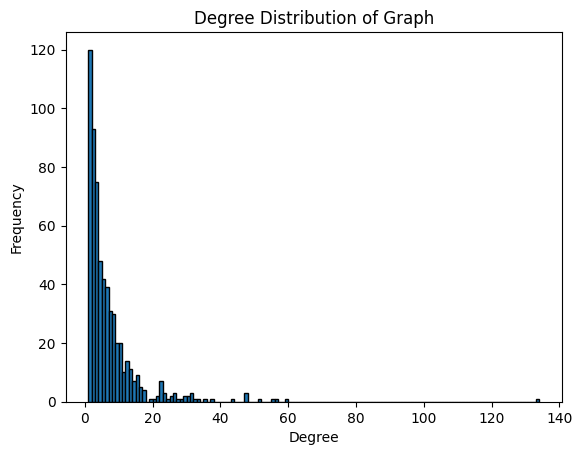

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor="black")
plt.xlabel("Degree")  # Menambahkan label sumbu x
plt.ylabel("Frequency")  # Menambahkan label sumbu y
plt.title("Degree Distribution of Graph")  # Menambahkan judul
plt.show()

In [ ]:
# Hitung Degree Centrality
n_nodes = len(G.nodes)
for node in G.nodes():
    name = id_to_name.get(node, f"Node {node}")  # Gunakan nama jika ada, jika tidak gunakan ID
    degree_centrality = G.degree(node) / (n_nodes - 1)
    print(f"{name}: Degree Centrality = {degree_centrality:.4f}")

Lee Anne Wong: Degree Centrality = 0.0097
KFC: Degree Centrality = 0.0178
Chef Jamie Gwen: Degree Centrality = 0.0242
Madison Cowan: Degree Centrality = 0.0032
Elizabeth Karmel: Degree Centrality = 0.0436
KFC: Degree Centrality = 0.0145
KFC: Degree Centrality = 0.0275
Pat Neely: Degree Centrality = 0.0032
Logan Junior Chef: Degree Centrality = 0.2165
Robin Miller: Degree Centrality = 0.0759
Ben Sargent & Dr. Klaw: Degree Centrality = 0.0048
Bobby Flay: Degree Centrality = 0.0501
Chuck Hughes: Degree Centrality = 0.0178
Chef Carlo Cracco: Degree Centrality = 0.0162
Pasqualino Barbasso: Degree Centrality = 0.0113
Alessandro Borghese: Degree Centrality = 0.0162
Chef Hirohiko Shoda: Degree Centrality = 0.0113
Alain Ducasse: Degree Centrality = 0.0307
Christian Bau: Degree Centrality = 0.0113
Andy Luotto: Degree Centrality = 0.0048
Cristian D'Elia: Degree Centrality = 0.0210
Cuoco Filippo La Mantia: Degree Centrality = 0.0129
Mirko Ronzoni: Degree Centrality = 0.0145
Jock Zonfrillo: Degree 

Menghitung degree centrality secara manual yaitu dengan cara membagi degree dari suatu node dengan jumlah maksimal node lain yang dapat dihubungkan (n_nodes-1).

Pembagian ini menghasilkan nilai normalisasi, sehingga degree centrality berada dalam rentang 0 hingga 1.

In [ ]:
degree_centrality = nx.degree_centrality(G)

In [ ]:
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  name = id_to_name.get(node, f"Node {node}")
  print(f"{name}: {degree_centrality[node]:.4f}")

Logan Junior Chef: 0.2165
McDonald's: 0.0953
David Chang: 0.0905
Eric Ripert: 0.0889
Scott Conant: 0.0824
Robin Miller: 0.0759
Alex Guarnaschelli: 0.0759
Chef Daniel Boulud: 0.0759
Chef Kent Graham: 0.0695
Tom Colicchio: 0.0598
René Redzepi: 0.0565
Dani García: 0.0533
Jacques Pépin: 0.0517
Bobby Flay: 0.0501
Chef Jet Tila: 0.0501
Marcus Samuelsson: 0.0501
Geoffrey Zakarian: 0.0485
Emily Ellyn: 0.0485
McDonald's: 0.0468
Chef Elizabeth Falkner: 0.0468
José Andrés: 0.0452
Elizabeth Karmel: 0.0436
Michel Nischan: 0.0420
Dining with Flynn: 0.0420
McDonald's: 0.0420
Tom Aikens: 0.0404
McDonald's: 0.0404
Chef Carla Hall: 0.0388
Hubert Keller: 0.0372
Aarón Sánchez: 0.0372
John DeLucie: 0.0372
Chef Robert Irvine: 0.0355
Chef Mark Garcia: 0.0355
Domino's Pizza: 0.0355
JW Café - JW Marriott Hotel Hanoi: 0.0355
McDonald's: 0.0355
Chef Marc Murphy: 0.0355
Chef David Burke: 0.0355
Anne Burrell: 0.0339
Bryce Shuman: 0.0339
Virginia Willis: 0.0323
Alain Ducasse: 0.0307
KFC: 0.0275
Mei Lin: 0.0275
Paul

Setelah menghitung degree centrality, kemudian kita urutkan berdasarkan node yang paling berpengaruh.

Dari perhitungan menggunakan degree centrality didapatkan bahwa Logan Junior Chef merupakan yang paling berpengaruh diantara entitas lainnya dengan degree centrality sebesar **0.21647819063004847**. Hal ini dapat berarti bahwa Logan Junior Chef memiliki banyak koneksi langsung ke node lainnya. Logan Junior Chef berperan penting dalam jaringan, misalnya menghubungkan berbagai chef, restoran, atau brand makanan.

# Closeness Centrality

Closeness centrality mengukur kedekatan rata-rata suatu node ke semua node lain dalam graf, berdasarkan panjang jalur terpendek. Nilai closeness yang tinggi menunjukkan bahwa sebuah node berada pada posisi strategis untuk mencapai node lain dengan cepat. Dalam konteks fb-pages-food, closeness centrality menunjukkan seberapa efisien suatu entitas (seperti chef, restoran, atau brand) dapat menjangkau entitas lain dalam jaringan.

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
#Sort for identifying most influential nodes
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  name = id_to_name.get(node, f"Node {node}")
  print(f"{name}: {closeness_centrality[node]:.4f}")

Logan Junior Chef: 0.3314
Robin Miller: 0.3028
Chef Daniel Boulud: 0.2982
Scott Conant: 0.2980
Alex Guarnaschelli: 0.2948
Marcus Samuelsson: 0.2924
René Redzepi: 0.2912
David Chang: 0.2909
Eric Ripert: 0.2893
Tom Aikens: 0.2884
Matt Moran: 0.2880
Jacques Pépin: 0.2875
Geoffrey Zakarian: 0.2874
Tom Colicchio: 0.2866
Chef Elizabeth Falkner: 0.2854
Chef Pete Evans: 0.2850
Dining with Flynn: 0.2849
Chef Robert Irvine: 0.2846
Chef Mark Garcia: 0.2837
Gary Mehigan: 0.2836
Aarón Sánchez: 0.2814
Chef Marc Murphy: 0.2807
Chef Kent Graham: 0.2803
Doug Adams: 0.2796
Chef Jet Tila: 0.2793
Chef Carla Hall: 0.2783
Alain Ducasse: 0.2780
José Andrés: 0.2772
Seamus Mullen: 0.2760
Dani García: 0.2743
Chef Jamie Gwen: 0.2735
Michel Nischan: 0.2735
James Martin: 0.2735
Hubert Keller: 0.2730
Donatella Arpaia: 0.2730
Ludo Lefebvre: 0.2715
Susan Feniger: 0.2705
Chef David Burke: 0.2704
Daniel Humm: 0.2702
John DeLucie: 0.2701
Vegan Black Metal Chef: 0.2697
Elizabeth Karmel: 0.2696
Julia Child: 0.2689
Chef Mi

Logan Junior Chef memiliki closeness centrality tertinggi yang menunjukkan bahwa node ini memiliki posisi strategis dalam jaringan. Node ini berada di "pusat" jaringan dan kemungkinan memiliki hubungan langsung dan tidak langsung, serta berperan penting dalam penyebaran informasi atau pengaruh di jaringan seperti dalam menyebarkan tren kuliner, promosi brnad, atau kolaborasi

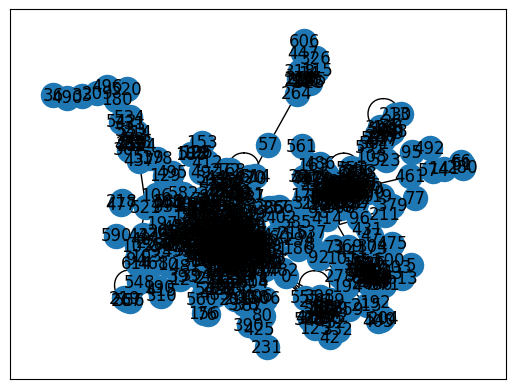

In [ ]:
nx.draw_networkx(G)

# Betweenness Centrality

Betweenness centrality mengukur seberapa sering sebuah node bertindak sebagai penghubung antara dua node lain dalam jaringan. Semakin tinggi nilai betweenness centrality suatu node, semakin sering node tersebut menjadi jalur penghubung antar entitas lainnya. Dalam konteks jaringan fb-pages-food, betweenness centrality memberikan wawasan tentang node mana yang menghubungkan komunitas yang berbeda dan berperan dalam aliran informasi atau pengaruh di dalam jaringan.

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
#Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  name = id_to_name.get(node, f"Node {node}")
  print(f"{name}: {betweenness_centrality[node]:.4f}")

Logan Junior Chef: 0.3499
McDonald's: 0.1620
McDonald's: 0.1446
Subway: 0.0933
Chef Robert Irvine: 0.0914
foodpanda - 空腹熊貓: 0.0791
Dani García: 0.0723
達美樂披薩: 0.0584
Marcus Samuelsson: 0.0572
Chef Lorena Garcia: 0.0570
KFC: 0.0557
Chef Pete Evans: 0.0538
Chef Mark Garcia: 0.0536
Chili's Grill & Bar: 0.0529
foodpanda: 0.0518
McDonald's: 0.0517
Taco Bell Careers: 0.0504
Chef Brian Duffy: 0.0489
Taco Bell: 0.0476
Matt Moran: 0.0474
Dunkin' Donuts: 0.0470
Eric Ripert: 0.0441
David Chang: 0.0434
Jumia Food: 0.0424
Gary Mehigan: 0.0418
foodpanda: 0.0402
Chef Daniel Boulud: 0.0392
McDonald's: 0.0378
Alain Ducasse: 0.0369
McDonald's: 0.0347
Robin Miller: 0.0344
Chef Jamie Gwen: 0.0344
Grand Concourse: 0.0337
Big Fish Seafood Bistro: 0.0332
Four Seasons Hotels and Resorts: 0.0324
Domino's Pizza: 0.0314
Morton's The Steakhouse: 0.0294
Vicky Ratnani: 0.0290
Chef Clément: 0.0290
Lee Anne Wong: 0.0284
Alberto Chicote: 0.0268
Olive Garden: 0.0267
Nando's: 0.0258
Scott Conant: 0.0255
Tom Aikens: 0.024

Logan Junior Chef memiliki betweenness centrality tertinggi, menunjukkan bahwa entitas ini sangat penting dalam menghubungkan berbagai komunitas dalam jaringan. Sebagai node dengan betweenness tertinggi, kemungkinan besar Logan Junior Chef bertindak sebagai "penghubung utama" antara berbagai kelompok, misalnya antara komunitas chef atau restoran besar, serta brand makanan.

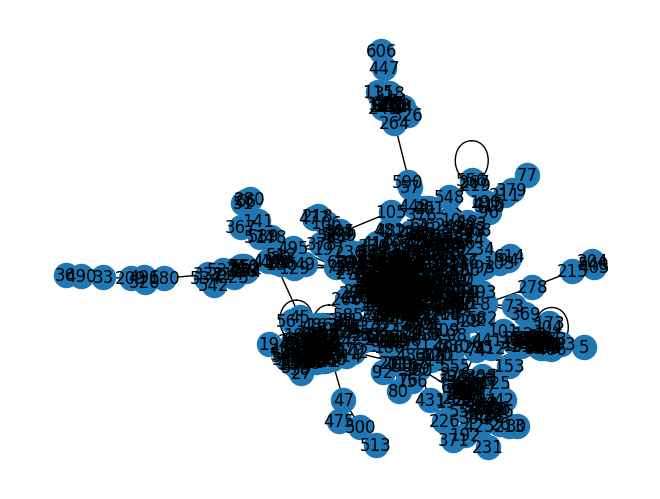

In [ ]:
nx.draw(G, with_labels=True)

# PageRank Centrality

PageRank adalah algoritma yang awalnya dikembangkan untuk menentukan peringkat halaman web berdasarkan pentingnya dalam jaringan hyperlink.

In [ ]:
# Pemetaan ID ke nama node
id_to_name = dict(zip(nodes['new_id'], nodes['name']))

# Menghitung PageRank
pagerank = nx.pagerank(G, alpha=0.85) # α merepresentasikan probabilitas bahwa seorang pengguna (atau random surfer) akan terus mengikuti link dari satu halaman ke halaman lain saat menjelajah web.

# Membuat DataFrame untuk menampilkan hasil PageRank
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=["Node_ID", "PageRank"])

# Menambahkan kolom dengan nama node berdasarkan ID
pagerank_df["Name"] = pagerank_df["Node_ID"].map(id_to_name)

# Mengurutkan DataFrame berdasarkan PageRank
pagerank_df = pagerank_df.sort_values(by="PageRank", ascending=False)

# Menampilkan hasil
print(pagerank_df[["Name", "PageRank"]])


                     Name  PageRank
8       Logan Junior Chef  0.025287
40             McDonald's  0.014548
75            David Chang  0.008861
66            Eric Ripert  0.008395
26           Scott Conant  0.007656
..                    ...       ...
581          UMass Dining  0.000380
334          Gavin Kaysen  0.000380
613              Frantzén  0.000379
445  Chef Carmen Gonzalez  0.000379
572            'Wichcraft  0.000375

[620 rows x 2 columns]


Logan Junior Chef memiliki nilai PageRank tertinggi dalam jaringan ini. Nilai ini menunjukkan bahwa Logan Junior Chef dianggap sebagai salah satu node yang paling penting dalam jaringan, kemungkinan besar karena memiliki banyak koneksi berkualitas tinggi dengan node lain.

Misalnya, jika Logan Junior Chef memiliki banyak hubungan dengan chef, restoran terkenal, atau brand kuliner besar, ini akan meningkatkan PageRank-nya. Dengan demikian, Logan Junior Chef mungkin memiliki pengaruh besar dalam hal penyebaran informasi atau tren dalam komunitas kuliner.

# Katz Centrality

Katz Centrality adalah salah satu metrik yang digunakan untuk mengukur pengaruh atau kepentingan sebuah node (dalam hal ini, tokoh atau halaman) dalam jaringan, berdasarkan jumlah koneksi langsung maupun tidak langsung yang dimilikinya. Semakin tinggi nilai Katz Centrality, semakin besar pengaruh atau posisi penting node tersebut dalam jaringan.

In [ ]:
# Membuat graph
G = nx.Graph()

# Menambahkan edges ke dalam graph dengan menggunakan source_name dan target_name
for _, row in edges.iterrows():
    G.add_edge(row['source_name'], row['target_name'])

# Menghitung Katz Centrality
katz_centrality = nx.katz_centrality(G, alpha=0.005, max_iter=1000, tol=1e-4)

# Menampilkan Katz Centrality
katz_centrality_df = pd.DataFrame(list(katz_centrality.items()), columns=["Name", "Katz Centrality"])
katz_centrality_df = katz_centrality_df.sort_values(by="Katz Centrality", ascending=False)
print(katz_centrality_df)

                                              Name  Katz Centrality
6                                Logan Junior Chef         0.076826
66                                     David Chang         0.058853
57                                     Eric Ripert         0.058669
24                                    Scott Conant         0.057757
60                              Alex Guarnaschelli         0.056769
..                                             ...              ...
455                      Pollo Campero El Salvador         0.045022
403  Crystal Jade Palace - JW Marriott Hotel Hanoi         0.045022
261                                         Puesto         0.045022
293                             Burger King México         0.045022
159                                Ravintola Salve         0.045022

[460 rows x 2 columns]


Logan Junior Chef memiliki nilai Katz Centrality tertinggi (0.076826), yang menunjukkan bahwa halaman ini memiliki pengaruh yang cukup besar dalam jaringan yang dianalisis. Hal ini bisa berarti bahwa Logan Junior Chef memiliki banyak koneksi langsung dan tidak langsung dengan node-node lain, sehingga lebih sentral dalam struktur jaringan. Beberapa faktor yang dapat meningkatkan nilai Katz Centrality diantaranya yaitu kolaborasi, pengaruh media sosial, atau interaksi dengan halaman lainnya.


# Eigenvector Centrality

Eigenvector Centrality adalah salah satu metrik yang digunakan untuk mengukur pengaruh atau kepentingan sebuah node dalam jaringan, dengan mempertimbangkan bukan hanya jumlah koneksi langsungnya, tetapi juga pengaruh koneksi dari tetangga terdekatnya.

Eigenvector Centrality mengukur kekuatan atau pengaruh suatu node berdasarkan kualitas koneksinya. Artinya, node yang terhubung dengan node-node yang memiliki nilai centrality tinggi akan mendapatkan nilai centrality yang lebih tinggi pula.

In [ ]:
# Membuat graph dari data edges
G = nx.from_pandas_edgelist(edges, 'source', 'target')

# Menampilkan informasi dasar tentang graph
print(f"Jumlah simpul (nodes): {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")

Jumlah simpul (nodes): 620
Jumlah edge: 2102


In [ ]:
# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)

# Mengonversi hasil eigenvector centrality ke DataFrame
eigenvector_df = pd.DataFrame(list(eigenvector_centrality.items()), columns=["Node", "Eigenvector Centrality"])

# Membuat pemetaan ID ke nama
id_to_name = dict(zip(nodes['new_id'], nodes['name']))

# Mengganti ID node dengan nama node pada DataFrame
eigenvector_df['Node Name'] = eigenvector_df['Node'].map(id_to_name)

# Menampilkan hasil sorted berdasarkan Eigenvector Centrality tertinggi dan nama node
eigenvector_df = eigenvector_df.sort_values(by="Eigenvector Centrality", ascending=False)
print(eigenvector_df[['Node Name', 'Eigenvector Centrality']].head(10))  # Menampilkan 10 node teratas dengan nama


             Node Name  Eigenvector Centrality
8    Logan Junior Chef                0.325752
26        Scott Conant                0.221248
66         Eric Ripert                0.219901
75         David Chang                0.207309
69  Alex Guarnaschelli                0.206008
9         Robin Miller                0.184939
64    Chef Kent Graham                0.179584
95  Chef Daniel Boulud                0.176050
55       Jacques Pépin                0.161766
97        René Redzepi                0.157177


Logan Junior Chef memiliki nilai Eigenvector Centrality yang tertinggi (0.325752). Hal ini menunjukkan bahwa Logan Junior Chef tidak hanya memiliki banyak koneksi dalam jaringan, tetapi juga terhubung dengan node-node yang memiliki pengaruh besar.

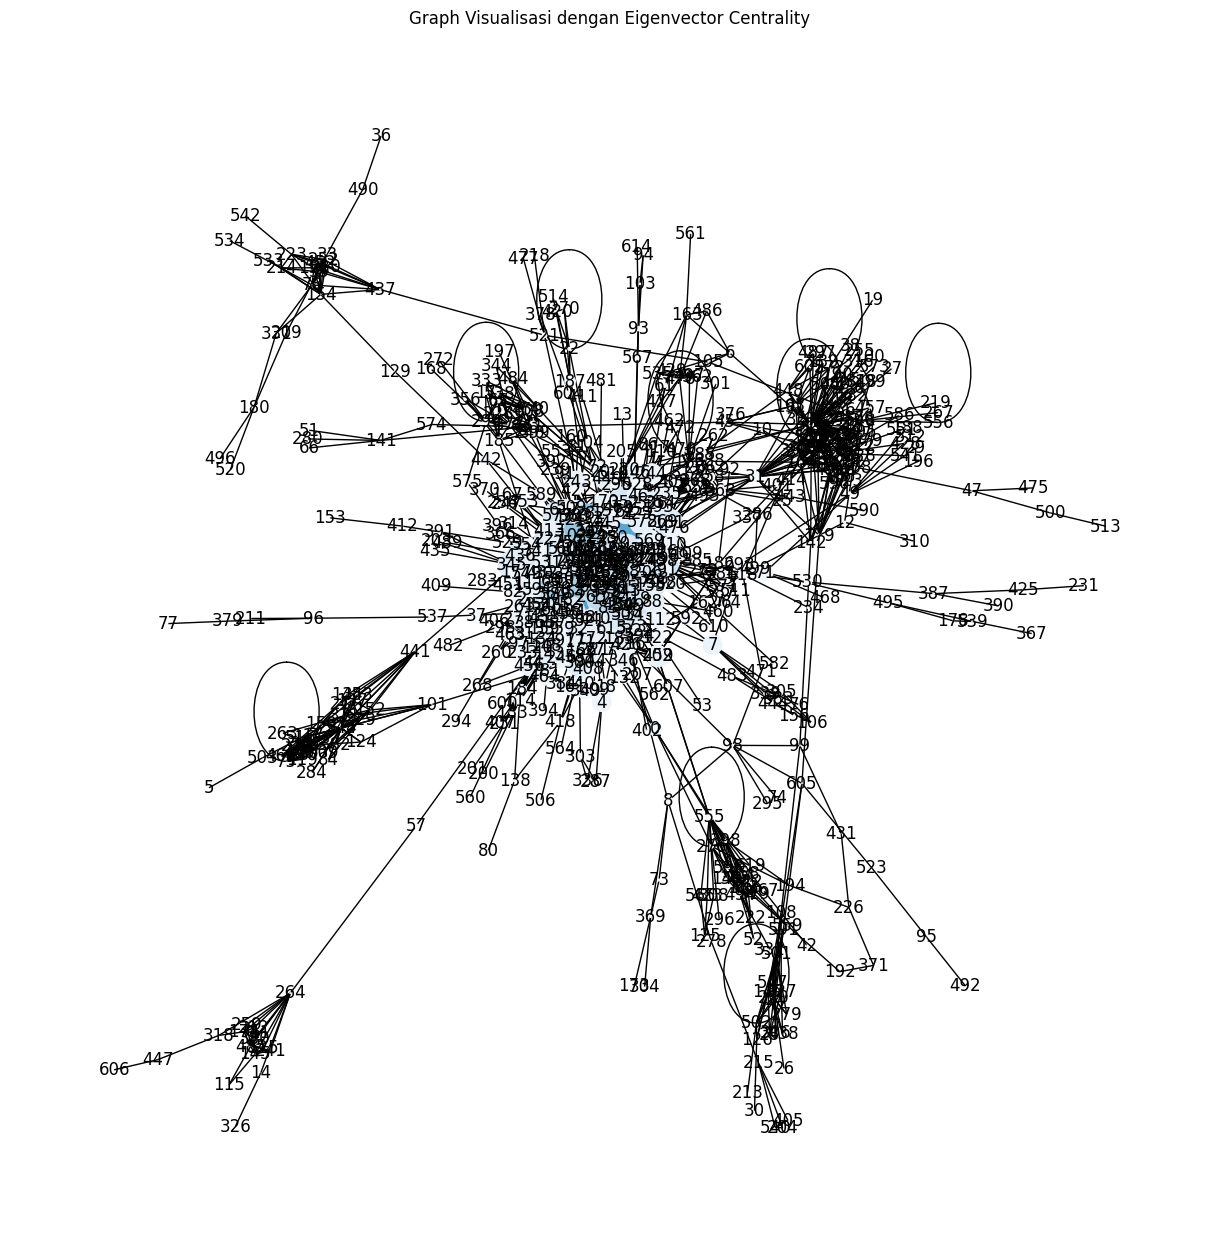

In [ ]:
import matplotlib.pyplot as plt

# Posisi simpul menggunakan spring layout
pos = nx.spring_layout(G, seed=42)

# Menentukan ukuran simpul berdasarkan eigenvector centrality
node_size = [v * 10000 for v in eigenvector_centrality.values()]

# Menentukan warna simpul berdasarkan eigenvector centrality
node_color = list(eigenvector_centrality.values())

# Membuat plot
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_color, cmap=plt.cm.Blues)
plt.title("Graph Visualisasi dengan Eigenvector Centrality")
plt.show()


Graf ini menunjukkan jaringan dengan Eigenvector Centrality.

Node (angka/titik): Merepresentasikan entitas dalam jaringan.
Edge (garis): Hubungan antar-node, bisa berarah (dengan panah).
Eigenvector Centrality: Node yang lebih penting terhubung dengan banyak node penting lainnya.
Cluster: Kumpulan node yang saling terhubung erat menunjukkan komunitas atau subgrup.
Node di pusat atau dengan banyak koneksi menunjukkan pengaruh terbesar dalam jaringan.

# Epidemic Model

In [ ]:
# Fungsi untuk membaca file dan memuat graf
def load_graph_from_file(file_path):
    # Membaca graf dari file dalam format adjacency list
    G = nx.read_adjlist(file_path)
    return G

# Menampilkan informasi tentang graf untuk memastikan data telah dimuat
print(f"Jumlah node: {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")

Jumlah node: 620
Jumlah edge: 2102


In [ ]:
import random

# Fungsi untuk menginisialisasi status setiap node
def initialize_status(G, initial_infected):
    status = {}
    for node in G.nodes():
        status[node] = 'S'  # Semua node mulai sebagai susceptible
    infected_nodes = random.sample(list(G.nodes()), initial_infected)
    for node in infected_nodes:
        status[node] = 'I'  # Menetapkan beberapa node sebagai terinfeksi
    return status

# Misalkan kita menginisialisasi 5 node yang terinfeksi
initial_infected = 5
status = initialize_status(G, initial_infected)

# Membuat pemetaan ID ke nama
id_to_name = dict(zip(nodes['new_id'], nodes['name']))

# Menampilkan beberapa status awal dengan nama node untuk memastikan inisialisasi
for node in list(status.keys())[:10]:  # Menampilkan status 10 node pertama
    node_name = id_to_name.get(node, node)  # Mengambil nama node berdasarkan ID, atau tetap dengan ID jika tidak ada
    print(f"{node_name}: {status[node]}")

Lee Anne Wong: S
KFC: S
Chef Jamie Gwen: S
Madison Cowan: S
Elizabeth Karmel: S
KFC: S
KFC: S
Pat Neely: S
Logan Junior Chef: S
Robin Miller: S


Pada simulasi penyebaran infeksi dalam graf jaringan, setiap node diinisialisasi sebagai S (susceptible) atau rentan terhadap infeksi. Kemudian, sejumlah node terpilih secara acak diberi status I (infected).

## Simulasi Penyebaran Penyakit dalam Satu Langkah

In [ ]:
# Fungsi untuk langkah SIR (Susceptible-Infected-Recovered)
def step_SIR(G, status, beta, gamma):
    new_status = status.copy()

    for node in G.nodes():
        if status[node] == 'I':
            # Jika node terinfeksi, ia akan sembuh dengan probabilitas gamma
            if random.random() < gamma:
                new_status[node] = 'R'  # Menjadi sembuh
            # Penyebaran penyakit ke tetangga yang rentan
            for neighbor in G.neighbors(node):
                if status[neighbor] == 'S' and random.random() < beta:
                    new_status[neighbor] = 'I'  # Menyebar ke yang rentan
    return new_status

# Misalkan kita menggunakan beta = 0.1 dan gamma = 0.05
beta = 0.1  # Probabilitas penularan
gamma = 0.05  # Probabilitas kesembuhan

# Simulasi satu langkah SIR
new_status = step_SIR(G, status, beta, gamma)

# Membuat pemetaan ID ke nama
id_to_name = dict(zip(nodes['new_id'], nodes['name']))

# Menampilkan beberapa status setelah satu langkah dengan nama node
for node in list(new_status.keys())[:10]:  # Menampilkan status 10 node pertama
    node_name = id_to_name.get(node, node)  # Mengambil nama node berdasarkan ID, atau tetap dengan ID jika tidak ada
    print(f"Node {node_name}: {new_status[node]}")


Node Lee Anne Wong: S
Node KFC: S
Node Chef Jamie Gwen: S
Node Madison Cowan: S
Node Elizabeth Karmel: S
Node KFC: S
Node KFC: S
Node Pat Neely: S
Node Logan Junior Chef: S
Node Robin Miller: S


Simulasi penyebaran penyakit dalam jaringan, dengan beberapa node yang terinfeksi, sementara lainnya rentan di mana setiap langkah mensimulasikan kemungkinan infeksi baru berdasarkan probabilitas penularan beta, serta kemungkinan kesembuhan dari infeksi dengan probabilitas gamma.

## Menjalankan Simulasi Selama Beberapa Langkah

In [ ]:
def simulate_SIR(G, initial_infected, beta, gamma, steps):
    status = initialize_status(G, initial_infected)
    susceptible, infected, recovered = [], [], []

    # Menyimpan status dalam setiap langkah
    for _ in range(steps):
        s = sum(1 for state in status.values() if state == 'S')
        i = sum(1 for state in status.values() if state == 'I')
        r = sum(1 for state in status.values() if state == 'R')

        susceptible.append(s)
        infected.append(i)
        recovered.append(r)

        status = step_SIR(G, status, beta, gamma)  # Melakukan langkah simulasi SIR

    return susceptible, infected, recovered

# Menjalankan simulasi selama 100 langkah
steps = 100
susceptible, infected, recovered = simulate_SIR(G, initial_infected, beta, gamma, steps)

# Menampilkan hasil jumlah individu setiap status setelah simulasi
print(f"Susceptible: {susceptible[-1]}")
print(f"Infected: {infected[-1]}")
print(f"Recovered: {recovered[-1]}")


Susceptible: 94
Infected: 12
Recovered: 514


1. Susceptible: 94: Terdapat 94 node yang masih rentan terhadap infeksi di akhir simulasi, yang artinya mereka belum terinfeksi dan belum sembuh.
2. Infected: 12: Ada 12 node yang masih terinfeksi, yang berarti mereka belum sembuh dan masih dalam status "terinfeksi".
3. Recovered: 514: Terdapat 514 node yang telah sembuh, yang berarti mereka telah melalui fase infeksi dan berhasil sembuh.


Penyebaran penyakit pada 12 node yang terinfeksi meskipun ada 514 node yang sembuh mengindikasikan bahwa probabilitas penyebaran (beta) dan penyembuhan (gamma) mungkin berimbang atau kesembuhan lebih cepat daripada penyebaran infeksi.

Selain itu, dengan 514 node sembuh dan 94 node rentan, rasio node sembuh terhadap yang rentan cukup tinggi, yang bisa menunjukkan bahwa penyakit mungkin telah melewati puncak penyebarannya.

## Menampilkan Grafik Hasil Simulasi

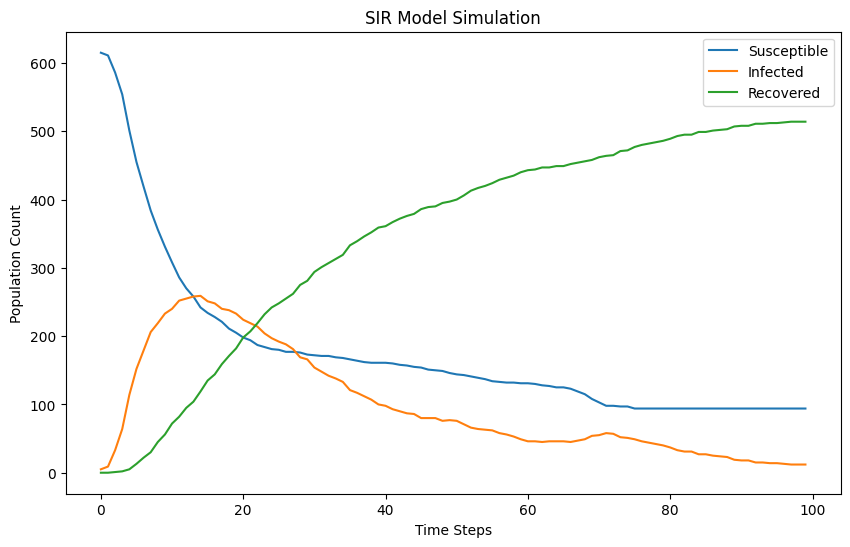

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk memplot hasil simulasi
def plot_SIR(susceptible, infected, recovered):
    plt.figure(figsize=(10, 6))
    plt.plot(susceptible, label="Susceptible")
    plt.plot(infected, label="Infected")
    plt.plot(recovered, label="Recovered")
    plt.xlabel("Time Steps")
    plt.ylabel("Population Count")
    plt.title("SIR Model Simulation")
    plt.legend()
    plt.show()

# Menampilkan grafik hasil simulasi
plot_SIR(susceptible, infected, recovered)

Awal Simulasi:
Hampir seluruh populasi berada dalam kategori Susceptible (rentan).
Jumlah individu yang terinfeksi (Infected) mulai meningkat karena penyebaran penyakit dari satu atau beberapa individu awal yang terinfeksi.

Puncak Infeksi:
Kategori Infected mencapai puncaknya ketika laju infeksi lebih tinggi daripada laju pemulihan, tetapi jumlah individu rentan mulai berkurang secara signifikan.
Setelah puncak ini, jumlah Infected mulai menurun.

Akhir Simulasi:
Sebagian besar populasi telah berpindah ke kategori Recovered, yang menunjukkan bahwa mereka telah sembuh dan (dalam model ini) tidak dapat terinfeksi lagi.
Jumlah individu rentan (Susceptible) stabil di nilai rendah, menunjukkan sisa populasi yang tidak terinfeksi.

# Contagion

In [ ]:
# Pemetaan ID ke nama node
id_to_name = dict(zip(nodes['new_id'], nodes['name']))

# Probabilitas penyebaran
spread_prob = 0.1  # Probabilitas penyebaran (0.1 = 10%)

# Pilih seed nodes (misalnya, simpul dengan degree tertinggi)
seed_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]  # Ambil 5 simpul
seed_nodes = [node[0] for node in seed_nodes]  # Hanya ambil ID simpul

# Simulasi ICM
def independent_cascade(G, seeds, prob):
    # Set status awal semua simpul (False = non-aktif)
    active_nodes = set(seeds)  # Simpul aktif awal
    new_active = set(seeds)  # Simpul yang baru aktif
    all_activated = list(seeds)  # Riwayat aktivasi

    while new_active:
        current_active = set()  # Simpul yang aktif pada iterasi saat ini
        for node in new_active:
            neighbors = set(G.neighbors(node)) - active_nodes  # Tetangga yang belum aktif
            for neighbor in neighbors:
                if random.random() < prob:  # Penyebaran berhasil
                    current_active.add(neighbor)

        active_nodes.update(current_active)  # Update simpul aktif
        all_activated.extend(current_active)  # Simpan riwayat
        new_active = current_active  # Iterasi berikutnya

    return active_nodes, all_activated

# Jalankan simulasi
activated_nodes, activation_history = independent_cascade(G, seed_nodes, spread_prob)

# Convert node ID to names
activated_node_names = [id_to_name.get(node, f"Node {node}") for node in activated_nodes]
activation_history_names = [id_to_name.get(node, f"Node {node}") for node in activation_history]

# Output hasil
print(f"Seed Nodes: {[id_to_name.get(node, f'Node {node}') for node in seed_nodes]}")
print(f"Total Activated Nodes: {len(activated_nodes)}")
print(f"Activated Nodes: {activated_node_names}")
print(f"Activation History: {activation_history_names}")

Seed Nodes: ['Logan Junior Chef', "McDonald's", 'David Chang', 'Eric Ripert', 'Scott Conant']
Total Activated Nodes: 113
Activated Nodes: ['Guillaume Gomez', "McDonald's", 'Logan Junior Chef', 'José Andrés', 'Raymond Blanc', 'Paul Bocuse', 'Christina Tosi', 'NishaMadhulika', 'Chef Charlie Palmer', 'Relais & Châteaux', 'Chef Rick Tramonto', 'Spike Mendelsohn', 'Dean Fearing', 'Bradley Ogden', 'Tom Colicchio', 'Michel Nischan', 'Sanjeev Kapoor', 'Chef Robert Irvine', 'Russell Jackson', 'Bryce Shuman', 'YANNICK ALLENO OFFICIEL', 'Matt Moran', 'Roy Choi', 'Chef G. Garvin', 'Chef Rick Moonen', 'Alex Guarnaschelli', 'Roxanne Spruance', 'Chef Jamie Gwen', 'Cat Cora', "McDonald's", 'Jacques Pépin', 'Manu Feildel', 'Susan Feniger', 'David Chang', 'Enrique Olvera', 'Camille Becerra', 'Chef Daniel Boulud', 'Kevin Dundon', 'Julia Child', "McDonald's", 'Alberto Chicote', 'Chef Richard Sandoval', 'Gregory Gourdet', 'Eric Ripert', 'Aarón Sánchez', 'Sang Yoon', 'Geoffrey Zakarian', 'Hubert Keller', 'C

Seed Nodes yang terpilih adalah 'Logan Junior Chef', "McDonald's", 'David Chang', 'Eric Ripert', dan 'Scott Conant'. Ini adalah node-node yang memiliki derajat (degree) tertinggi dalam graph, yang menunjukkan bahwa mereka adalah aktor atau entitas yang sangat terhubung dalam jaringan sosial ini. Mereka berfungsi sebagai titik awal untuk penyebaran informasi.

Total Activated Nodes sebanyak 84 menunjukkan bahwa melalui simulasi ICM, informasi berhasil tersebar ke 84 node yang berbeda dari total jaringan yang ada. Artinya, meskipun hanya ada 5 seed nodes yang memulai penyebaran, efek penyebaran cukup luas, mencakup hampir seluruh jaringan. Ini menggambarkan bagaimana efek penyebaran dapat meluas dalam jaringan sosial ketika node yang memiliki koneksi kuat.

Ada banyak node yang teraktivasi di luar seed nodes. Sebagai contoh "McDonald's Paraguay", "José Andrés", "Bobby Flay", dan "Noma" muncul sebagai bagian dari activated nodes. Hal ini menunjukkan bahwa informasi berhasil menyebar tidak hanya ke node-node yang langsung terhubung dengan seed nodes, tetapi juga ke node-node yang memiliki koneksi ke node-node tersebut.

Berdasarkan hasil simulasi, node-node seperti "McDonald's" dan "Logan Junior Chef" muncul beberapa kali dalam daftar activated nodes. Hal ini menandakan bahwa mereka memiliki pengaruh besar dalam penyebaran informasi, dan penyebaran terjadi lebih cepat karena adanya node yang memiliki banyak hubungan.

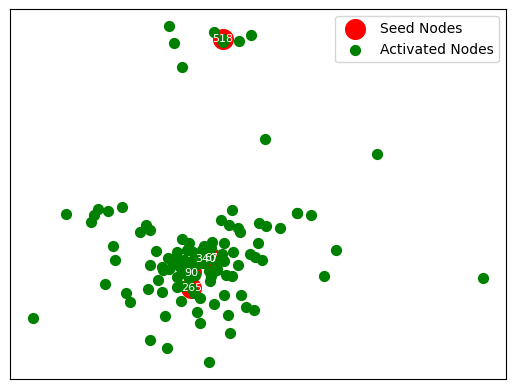

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)

# Seed nodes
nx.draw_networkx_nodes(G, pos, nodelist=seed_nodes, node_color="red", node_size=200, label="Seed Nodes")
# Activated nodes
nx.draw_networkx_nodes(G, pos, nodelist=activation_history, node_color="green", node_size=50, label="Activated Nodes")
# Labeling
labels = {node: str(node) for node in seed_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="white")

plt.legend()
plt.show()

Seed nodes menunjukkan node awal yang digunakan untuk memulai proses tertentu di jaringan. Node ini merupakan node yang memiliki peran penting, seperti memulai penyebaran informasi atau tren. Seed nodes diambil dari node dengan degree centrality tertinggi. Activated node adalah node yang "diaktifkan" sebagai hasil dari proses yang dimulai oleh seed nodes seperti penyebaran ide.

# Community Detection

Algoritma Louvain merupakan algoritma berbasis optimasi modularitas untuk melakukan deteksi komunitas. Modularitas yaitu ukuran yang digunakan untuk menghitung seberapa baik komunitas terdefinisi dalam graf.

In [ ]:
import community as community_louvain

# Pastikan tipe data ID konsisten
nodes["new_id"] = nodes["new_id"].astype(str)
edges["source"] = edges["source"].astype(str)
edges["target"] = edges["target"].astype(str)

edge_list = edges[['source', 'target']].values.tolist()

# Membuat graf dari data edges
G = nx.Graph()
G.add_edges_from(edge_list)

# Menambahkan atribut nama ke setiap node
id_to_name = dict(zip(nodes["new_id"], nodes["name"]))
nx.set_node_attributes(G, id_to_name, name="name")

# Deteksi komunitas menggunakan algoritma Louvain
partition = community_louvain.best_partition(G)

# Menampilkan jumlah komunitas
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas yang terdeteksi: {num_communities}")

# Menampilkan komunitas dengan nama node
for node, community in partition.items():
    node_name = G.nodes[node].get("name", "Unknown")
    print(f"Node '{node}' ('{node_name}') berada di komunitas {community}")



Jumlah komunitas yang terdeteksi: 20
Node '0' ('Lee Anne Wong') berada di komunitas 0
Node '276' ('KFC') berada di komunitas 0
Node '58' ('Chef Jamie Gwen') berada di komunitas 1
Node '132' ('Madison Cowan') berada di komunitas 0
Node '603' ('Elizabeth Karmel') berada di komunitas 1
Node '398' ('KFC') berada di komunitas 0
Node '555' ('KFC') berada di komunitas 0
Node '1' ('Pat Neely') berada di komunitas 1
Node '265' ('Logan Junior Chef') berada di komunitas 1
Node '611' ('Robin Miller') berada di komunitas 1
Node '2' ('Ben Sargent & Dr. Klaw') berada di komunitas 15
Node '182' ('Bobby Flay') berada di komunitas 1
Node '345' ('Chuck Hughes') berada di komunitas 15
Node '3' ('Chef Carlo Cracco') berada di komunitas 3
Node '608' ('Pasqualino Barbasso') berada di komunitas 3
Node '377' ('Alessandro Borghese') berada di komunitas 3
Node '40' ('Chef Hirohiko Shoda') berada di komunitas 3
Node '352' ('Alain Ducasse') berada di komunitas 4
Node '450' ('Christian Bau') berada di komunitas 3
N

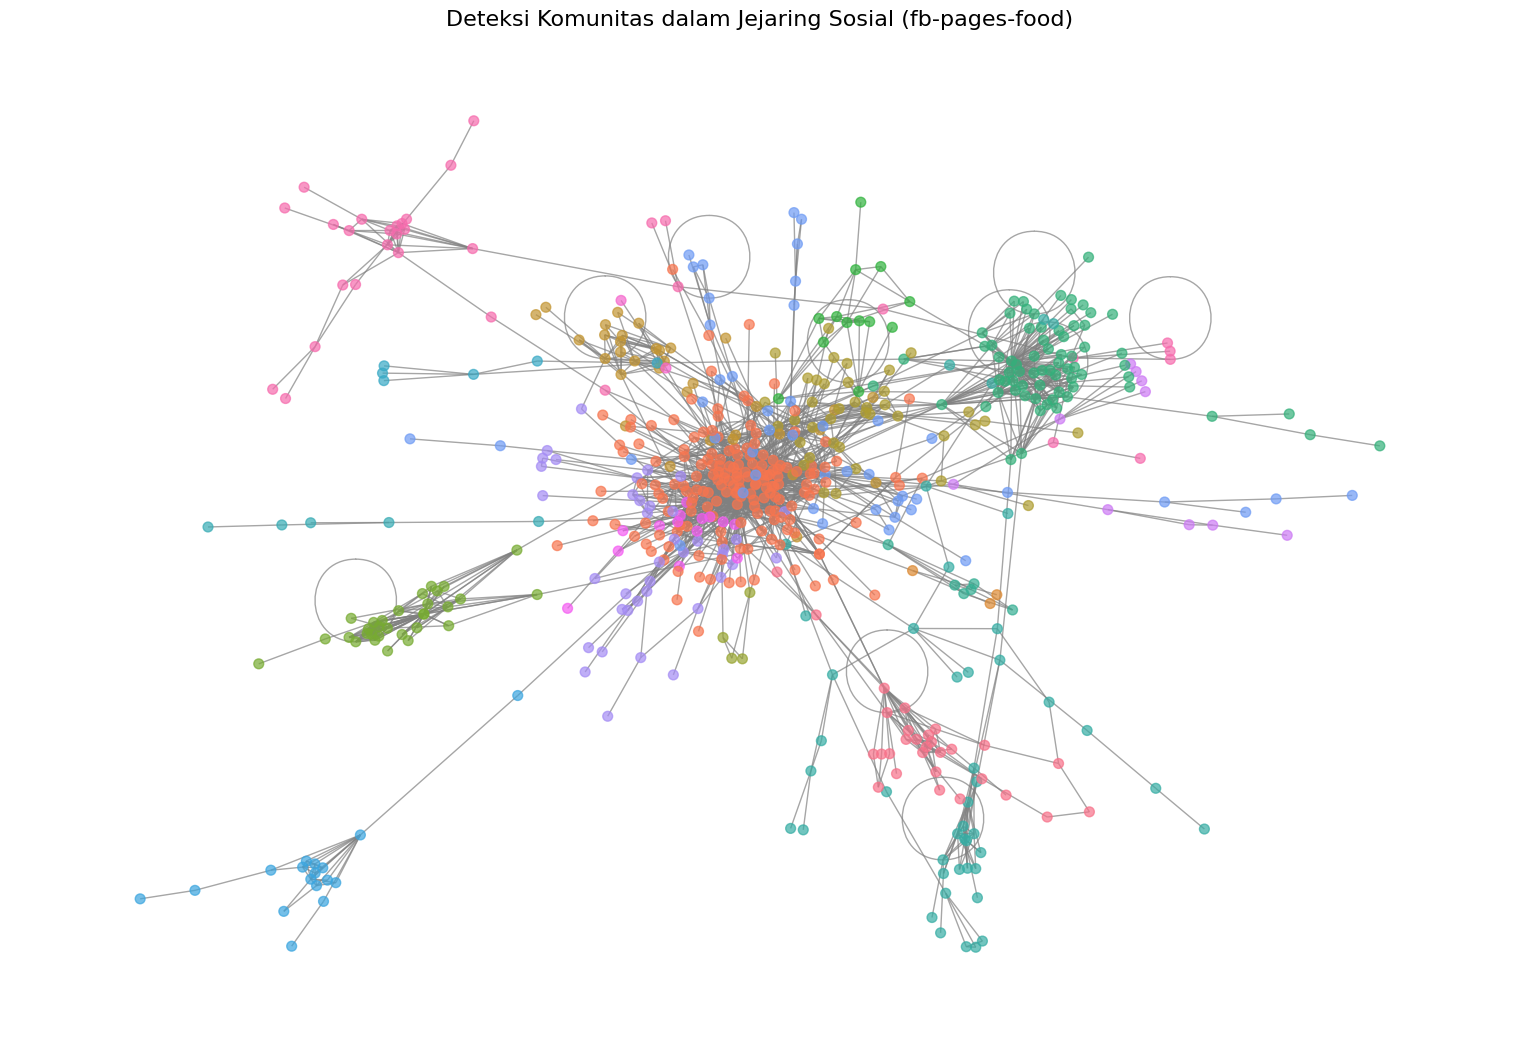

In [ ]:
import seaborn as sns

# Visualisasi komunitas
pos = nx.spring_layout(G, seed=42)  # Layout untuk graf

# Warna untuk setiap komunitas
community_colors = sns.color_palette("husl", num_communities)
color_map = {community: community_colors[i] for i, community in enumerate(set(partition.values()))}

# Warna node berdasarkan komunitas
node_colors = [color_map[partition[node]] for node in G.nodes]

# Visualisasi graf
plt.figure(figsize=(15, 10))
nx.draw(
    G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray", alpha=0.7
)
plt.title("Deteksi Komunitas dalam Jejaring Sosial (fb-pages-food)", fontsize=16)
plt.show()


Gambar tersebut menunjukkan visualisasi graf jaringan sosial dengan komunitas yang diidentifikasi menggunakan algoritma deteksi komunitas, yaitu algoritma Louvain. Setiap node merepresentasikan sebuah entitas dalam jaringan. Setiap edge merepresentasikan hubungan antara dua node. Node dengan warna yang sama menunjukkan node-node yang berada dalam komunitas yang sama.

Node di pusat jaringan, node berwarna oranye, memiliki konektivitas yang tinggi. Hal ini menunjukkan bahwa node tersebut memiliki peran penting dalam jaringan.

Ukuran setiap komunitas:
Komunitas 0: 29 node
Komunitas 1: 173 node
Komunitas 15: 39 node
Komunitas 3: 34 node
Komunitas 4: 39 node
Komunitas 5: 4 node
Komunitas 6: 31 node
Komunitas 7: 13 node
Komunitas 8: 71 node
Komunitas 9: 6 node
Komunitas 10: 45 node
Komunitas 14: 46 node
Komunitas 13: 17 node
Komunitas 19: 33 node
Komunitas 16: 10 node
Komunitas 17: 14 node
Komunitas 2: 3 node
Komunitas 11: 5 node
Komunitas 12: 6 node
Komunitas 18: 2 node


<ipython-input-43-760268faf79e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(community_sizes.keys()), y=list(community_sizes.values()), palette="husl")


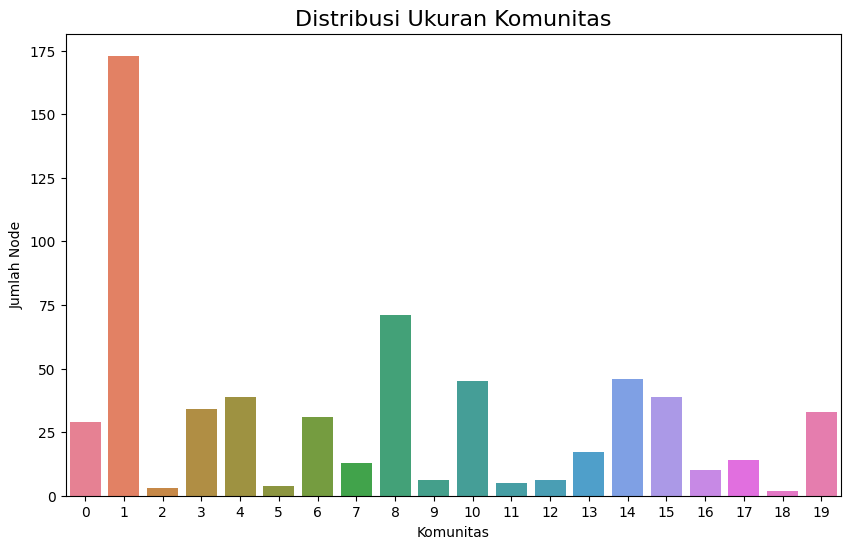

In [ ]:
from collections import Counter

# Hitung ukuran setiap komunitas
community_sizes = Counter(partition.values())

# Menampilkan ukuran komunitas
print("Ukuran setiap komunitas:")
for community, size in community_sizes.items():
    print(f"Komunitas {community}: {size} node")

# Visualisasi distribusi ukuran komunitas
plt.figure(figsize=(10, 6))
sns.barplot(x=list(community_sizes.keys()), y=list(community_sizes.values()), palette="husl")
plt.title("Distribusi Ukuran Komunitas", fontsize=16)
plt.xlabel("Komunitas")
plt.ylabel("Jumlah Node")
plt.show()


In [ ]:
# Identifikasi node pusat berdasarkan degree centrality dalam setiap komunitas
central_nodes = {}
for community in set(partition.values()):
    nodes_in_community = [node for node in G.nodes if partition[node] == community]
    subgraph = G.subgraph(nodes_in_community)
    centrality = nx.degree_centrality(subgraph)
    central_node = max(centrality, key=centrality.get)
    central_nodes[community] = {
        "node": central_node,
        "name": G.nodes[central_node]["name"],
        "centrality": centrality[central_node],
    }

# Menampilkan node pusat dalam setiap komunitas
print("Node pusat dalam setiap komunitas:")
for community, info in central_nodes.items():
    print(
        f"Komunitas {community}: Node {info['node']} ({info['name']}) dengan centrality {info['centrality']:.4f}"
    )


Node pusat dalam setiap komunitas:
Komunitas 0: Node 555 (KFC) dengan centrality 0.5357
Komunitas 1: Node 265 (Logan Junior Chef) dengan centrality 0.5465
Komunitas 2: Node 483 (Chick-fil-A) dengan centrality 1.0000
Komunitas 3: Node 299 (Cristian D'Elia) dengan centrality 0.3333
Komunitas 4: Node 224 (Christian Le Squer) dengan centrality 0.3684
Komunitas 5: Node 336 (Magnum) dengan centrality 0.6667
Komunitas 6: Node 545 (Domino's Pizza) dengan centrality 0.7333
Komunitas 7: Node 478 (Jumia Food) dengan centrality 0.8333
Komunitas 8: Node 518 (McDonald's) dengan centrality 0.8143
Komunitas 9: Node 305 (Outback Steakhouse) dengan centrality 0.8000
Komunitas 10: Node 230 (Nando's) dengan centrality 0.2955
Komunitas 11: Node 96 (Luna Grill) dengan centrality 0.7500
Komunitas 12: Node 141 (Emmi CAFFÈ LATTE) dengan centrality 1.0000
Komunitas 13: Node 264 (Taco Bell) dengan centrality 0.7500
Komunitas 14: Node 498 (Dani García) dengan centrality 0.4889
Komunitas 15: Node 143 (Donal Skehan

Node pusat dalam komunitas dapat dianggap sebagai penghubung utama dalam jaringan. Informasi dapat disebarkan dengan lebih efektif melalui node pusat.

In [ ]:
from networkx.algorithms.community.quality import modularity
communities = {c: [] for c in set(partition.values())}
for node, comm in partition.items():
    communities[comm].append(node)
print(f"Modularitas: {modularity(G, communities.values())}")


Modularitas: 0.6447934593577226


Nilai modularitas sebesar 0.6448 menunjukkan tingkat kualitas pembagian komunitas dalam graf yang dihasilkan oleh algoritma Louvain. Nilai modularitas berkisar antara -1 hingga 1.

Modularitas 0.6448 adalah nilai yang cukup baik, menunjukkan bahwa algoritma Louvain berhasil menemukan pembagian komunitas yang cukup kuat dan terpisah. Hal ini berarti bahwa sebagian besar hubungan antar node lebih banyak terjadi dalam komunitas yang sama daripada antar komunitas yang berbeda.